In [8]:
#the structure and size of the dataset

import pandas as pd

# Define the dataset path
dataset_path = r'C:\Users\31615\.data\pykeen\datasets\wn18rr'

# Load training, validation, and test data with full paths
train_data = pd.read_csv(f'{dataset_path}\\train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])
valid_data = pd.read_csv(f'{dataset_path}\\valid.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])
test_data = pd.read_csv(f'{dataset_path}\\test.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])

# Dataset statistics
print(f"Number of training triples: {len(train_data)}")
print(f"Number of validation triples: {len(valid_data)}")
print(f"Number of test triples: {len(test_data)}")

# Preview the data
print("Sample Training Data:")
print(train_data.head())


Number of training triples: 86835
Number of validation triples: 3034
Number of test triples: 3134
Sample Training Data:
      head                      relation     tail
0   260881                     _hypernym   260622
1  1332730  _derivationally_related_form  3122748
2  6066555  _derivationally_related_form   645415
3  9322930            _instance_hypernym  9360122
4  7193596  _derivationally_related_form   784342


Central entities: Definition: These are the entities with the highest degree, meaning they appear most frequently in the dataset (either as a head or a tail). example: Entity A appears in 3 triples.


In [ ]:
import pandas as pd

# Relation Patterns
relation_patterns = train_data.groupby('relation').apply(
    lambda x: {
        'unique_heads': x['head'].nunique(),
        'unique_tails': x['tail'].nunique()
    }
)

# Central Entities
entity_degrees = pd.concat([train_data['head'], train_data['tail']]).value_counts()
central_entities = entity_degrees.nlargest(10)

print("Relation Patterns:", relation_patterns)
print("Central Entities:", central_entities)


Relation Patterns: relation
_also_see                           {'unique_heads': 707, 'unique_tails': 787}
_derivationally_related_form    {'unique_heads': 16102, 'unique_tails': 16109}
_has_part                         {'unique_heads': 1978, 'unique_tails': 3990}
_hypernym                        {'unique_heads': 34033, 'unique_tails': 9500}
_instance_hypernym                 {'unique_heads': 2466, 'unique_tails': 404}
_member_meronym                   {'unique_heads': 3095, 'unique_tails': 7340}
_member_of_domain_region            {'unique_heads': 114, 'unique_tails': 873}
_member_of_domain_usage              {'unique_heads': 25, 'unique_tails': 594}
_similar_to                           {'unique_heads': 77, 'unique_tails': 76}
_synset_domain_topic_of            {'unique_heads': 2972, 'unique_tails': 309}
_verb_group                         {'unique_heads': 978, 'unique_tails': 980}
dtype: object
Central Entities: 8524735     482
8860123     467
7846        376
8199025     344
1157941

C:\Users\31615\AppData\Local\Temp\ipykernel_12712\2361930697.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  relation_patterns = train_data.groupby('relation').apply(


In [24]:
# Reinitialize dataset since environment reset
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


# **1. Entity-Relation Distribution**
unique_heads = train_data['head'].nunique()
unique_tails = train_data['tail'].nunique()
unique_relations = train_data['relation'].nunique()

entity_relation_distribution = {
    "Unique Heads": unique_heads,
    "Unique Tails": unique_tails,
    "Unique Relations": unique_relations
}
print("Entity-Relation Distribution:")
print(entity_relation_distribution)

Entity-Relation Distribution:
{'Unique Heads': 39610, 'Unique Tails': 31881, 'Unique Relations': 11}


In [25]:
# **2. Entity Degree Distribution**
entity_degrees = pd.concat([train_data['head'], train_data['tail']]).value_counts()
print("\nTop 10 Entity Degrees:")
print(entity_degrees.head(10))


Top 10 Entity Degrees:
8524735     482
8860123     467
7846        376
8199025     344
11579418    287
8441203     287
1507175     278
126264      259
1864707     251
12205694    234
Name: count, dtype: int64


In [ ]:
# **3. Relation Frequency**
relation_frequency = train_data['relation'].value_counts()
print("\nTop 10 Relation Frequencies:")
print(relation_frequency.head(11)) # 11 is total number of relations


Top 10 Relation Frequencies:
relation
_hypernym                       34796
_derivationally_related_form    29715
_member_meronym                  7402
_has_part                        4816
_synset_domain_topic_of          3116
_instance_hypernym               2921
_also_see                        1299
_verb_group                      1138
_member_of_domain_region          923
_member_of_domain_usage           629
_similar_to                        80
Name: count, dtype: int64


In [31]:
# **4. Head-Tail Distribution for Each Relation**
relation_patterns = train_data.groupby('relation').apply(
    lambda x: {
        'unique_heads': x['head'].nunique(),
        'unique_tails': x['tail'].nunique()
    }
)
print("\nHead-Tail Distribution for Each Relation:")
print(relation_patterns)


Head-Tail Distribution for Each Relation:
relation
_also_see                           {'unique_heads': 707, 'unique_tails': 787}
_derivationally_related_form    {'unique_heads': 16102, 'unique_tails': 16109}
_has_part                         {'unique_heads': 1978, 'unique_tails': 3990}
_hypernym                        {'unique_heads': 34033, 'unique_tails': 9500}
_instance_hypernym                 {'unique_heads': 2466, 'unique_tails': 404}
_member_meronym                   {'unique_heads': 3095, 'unique_tails': 7340}
_member_of_domain_region            {'unique_heads': 114, 'unique_tails': 873}
_member_of_domain_usage              {'unique_heads': 25, 'unique_tails': 594}
_similar_to                           {'unique_heads': 77, 'unique_tails': 76}
_synset_domain_topic_of            {'unique_heads': 2972, 'unique_tails': 309}
_verb_group                         {'unique_heads': 978, 'unique_tails': 980}
dtype: object


C:\Users\31615\AppData\Local\Temp\ipykernel_12712\3525490055.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  relation_patterns = train_data.groupby('relation').apply(


In [32]:
# **5. Relation Types (Symmetric, Asymmetric, Reflexive)**
# Symmetric: Check if reverse pairs exist
symmetric_relations = train_data.merge(
    train_data.rename(columns={'head': 'tail', 'tail': 'head'}),
    on=['head', 'relation', 'tail'],
    how='inner'
)['relation'].unique()

# Reflexive: Check if (a, R, a) exists
reflexive_relations = train_data[train_data['head'] == train_data['tail']]['relation'].unique()

# Relation Types Classification
relation_types = {
    relation: 'symmetric' if relation in symmetric_relations
    else 'reflexive' if relation in reflexive_relations
    else 'asymmetric'
    for relation in train_data['relation'].unique()
}

print("\nRelation Types (Symmetric, Asymmetric, Reflexive):")
print(relation_types)


Relation Types (Symmetric, Asymmetric, Reflexive):
{'_hypernym': 'asymmetric', '_derivationally_related_form': 'symmetric', '_instance_hypernym': 'asymmetric', '_also_see': 'symmetric', '_member_meronym': 'asymmetric', '_synset_domain_topic_of': 'symmetric', '_has_part': 'asymmetric', '_member_of_domain_usage': 'asymmetric', '_member_of_domain_region': 'asymmetric', '_verb_group': 'symmetric', '_similar_to': 'symmetric'}


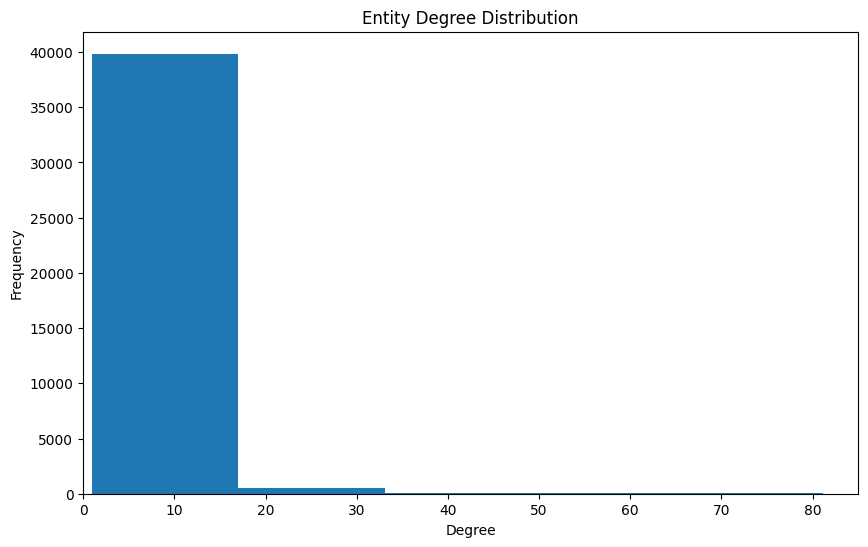

In [38]:
# **6. Degree Distribution Visualization**
plt.figure(figsize=(10, 6))
entity_degrees.plot(kind='hist', bins=30, title="Entity Degree Distribution")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xlim(0, 85) 
plt.show()

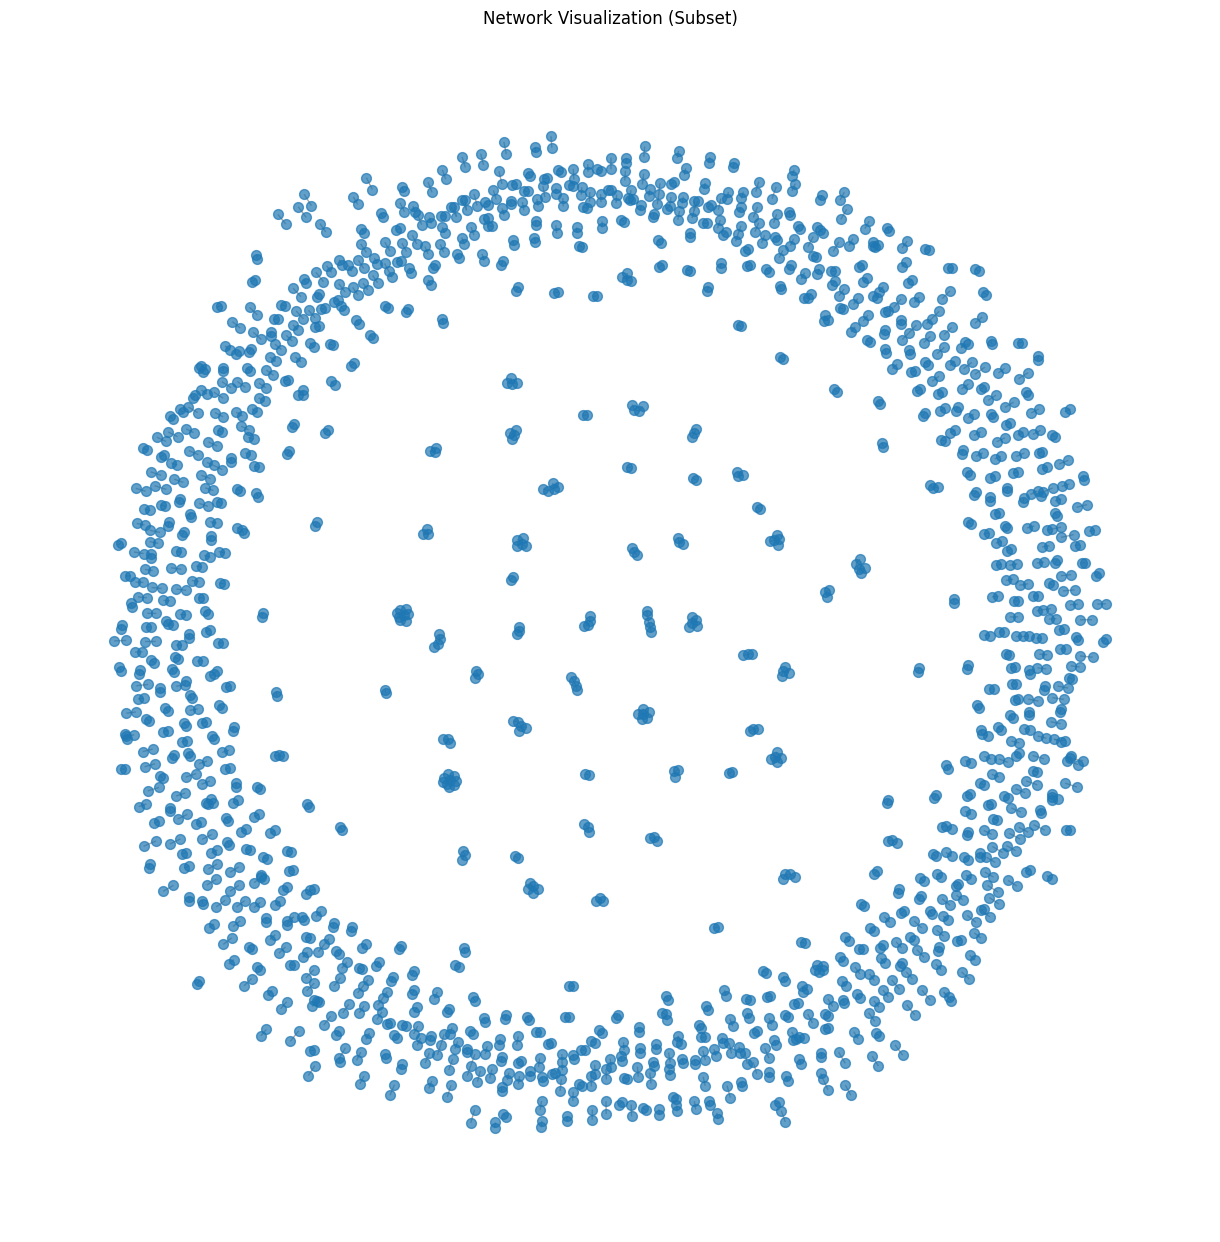

In [39]:
# **7. Network Visualization**
# Sample a subset of the data for visualization
subset_graph = nx.from_pandas_edgelist(
    train_data.sample(1000), source='head', target='tail', edge_attr='relation'
)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subset_graph, seed=42)
nx.draw(
    subset_graph,
    pos,
    with_labels=False,
    node_size=50,
    edge_color='gray',
    alpha=0.7
)
plt.title("Network Visualization (Subset)")
plt.show()